# Getting Started with NumPy

- It is handy to import everything from NumPy into a Python console:
```python
from numpy import *
```
- But it is easier to read and debug if you use explicit imports.
```python
import numpy as np
```

In [1]:
import numpy as np
print(np.__version__)

1.16.1


## Numpy Arrays

It was initially developed by [Travis Oliphant](https://www.continuum.io/people/travis-oliphant).

- There are important differences between NumPy arrays and Python lists:
    - NumPy arrays have a fixed size at creation.
    - NumPy arrays elements are all required to be of the same data type.
    - NumPy arrays operations are performed in compiled code for performance.
- Most of today's scientific/mathematical Python-based software use NumPy arrays.
- NumPy gives us the code simplicity of Python, but the operation is speedily executed by pre-compiled C code.

In [9]:
import random, operator
L1 = [random.random() for i in range(10000)]
L2 = [random.random() for i in range(10000)]

%timeit res = [l1+l2 for l1,l2 in zip(L1,L2) ]


646 µs ± 8.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
%timeit res = list(map(operator.add, L1, L2))

579 µs ± 2.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
A1 = np.array(L1)
A2 = np.array(L2)
%timeit A1 + A2

5.38 µs ± 28.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Sub-arrays

The numpy array slicing `x[lower:upper:step]` extracts a portion of a sequence by specifying a lower and upper bound. be aware that the lower-bound element is included, but the upper-bound element is **not** included. The default step value is 1 and can be negative.

In [14]:
a = np.array([10,11,12,13,14])
a[:2], a[-5:-3], a[0:2], a[-2:] # negative indices work

(array([10, 11]), array([10, 11]), array([10, 11]), array([13, 14]))

In [15]:
a[::2], a[::-1]

(array([10, 12, 14]), array([14, 13, 12, 11, 10]))

## Finite differences

We want to compute derivative of $f(x) = \sin(x)$ with finite difference method.
$$
    \frac{\partial f}{\partial x} \sim \frac{f(x+dx)-f(x)}{dx}
$$

derivatives values are centered in-between sample points.

Numpy provides the linspace function that returns an array of values equally spaced. You can also use the $sin$ function applied to all elements of $x$. Element wise operations are the “default mode”.

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
%config InlineBackend.figure_format = "retina" # HD screen
plt.rcParams["figure.figsize"] = (9, 4) # figure size on jupyter

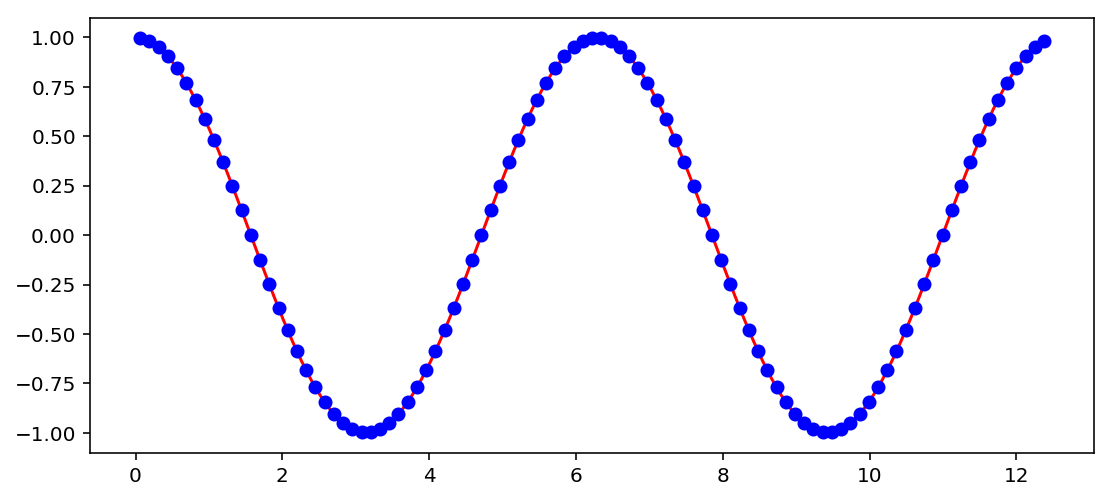

In [20]:
x, dx = np.linspace(0, 4*np.pi, 100, endpoint=False, retstep=True)
f = np.sin(x)
df = (f[1:]-f[:-1])/ dx
xc = 0.5*(x[:-1]+x[1:])
plt.plot(x, np.cos(x), 'r', xc, df, 'bo' );

### Exercise

Compute derivative using the second order formula:

$$
    \frac{\partial f_i}{\partial x} \sim \frac{f_{i+1}-f_{i-1}}{2dx}
$$

Plot the result.


## Numpy `diff` and `gradient`

In [21]:
f = np.sin(x)
df = np.gradient(f)/dx
df.size

100

In [24]:
df = (np.diff(f[1:], n=1)+np.diff(f[:-1], n=1))/(2*dx)
df.size

98

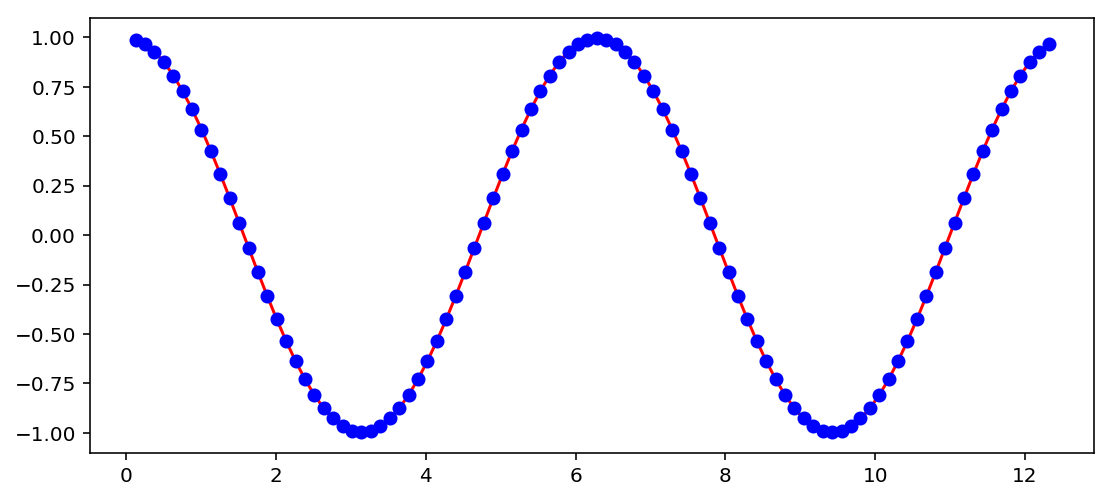

In [27]:
plt.plot(x[1:-1], np.cos(x[1:-1]), 'r', x[1:-1], df, 'bo' );

# Fast Fourier Transform

$$
y'(x) = \sum_{k=-\infty}^{+\infty} (\frac{2\pi}{L} k Y_k ) e^{2\pi/L kx}
$$

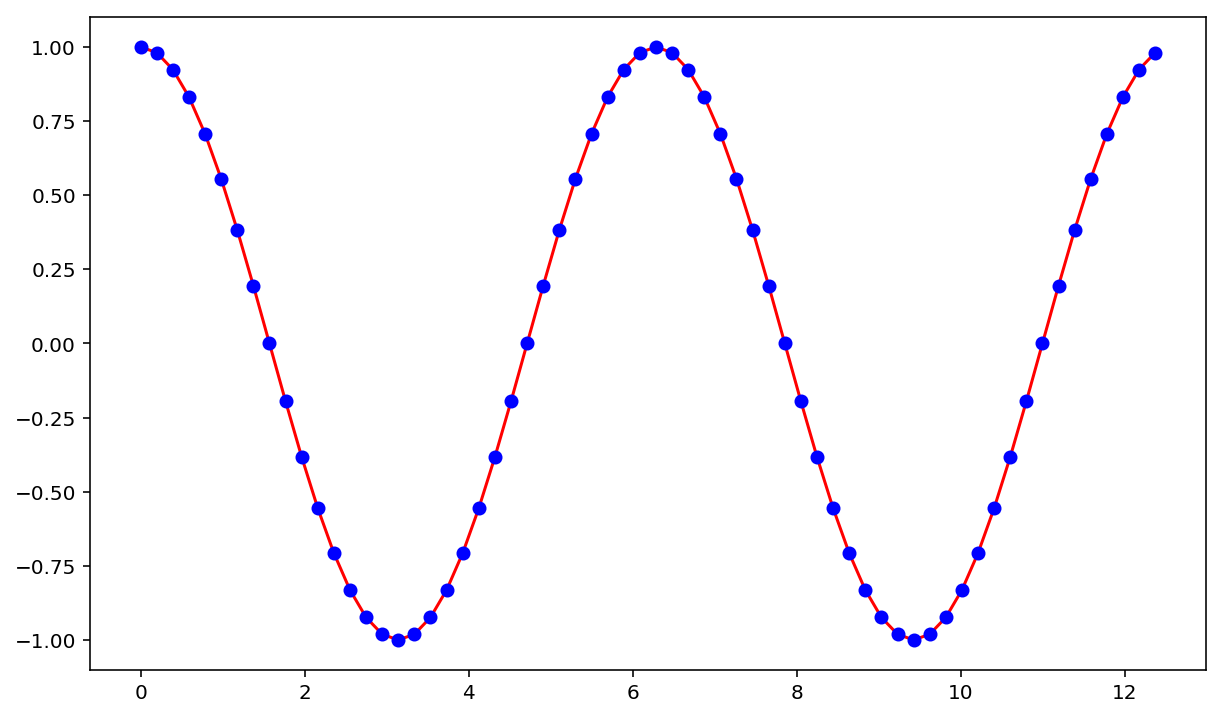

In [31]:
n, L = 64, 4*np.pi
x = np.linspace(0,L,n, endpoint=False)
k = 2*np.pi/L*np.concatenate((np.arange(n//2),np.arange(-n//2,0)))
f = np.sin(x)
df = np.real(np.fft.ifft(1j * kx * np.fft.fft(f)))
plt.plot(x, np.cos(x), 'r', x, df, 'bo' );

## Gray-Scott model

The reaction-diffusion system described here involves two generic chemical species U and V, whose concentration at a given point in space is referred to by variables u and v. As the term implies, they react with each other, and they diffuse through the medium. Therefore the concentration of U and V at any given location changes with time and can differ from that at other locations.

The overall behavior of the system is described by the following formula, two equations which describe three sources of increase and decrease for each of the two chemicals:


$$
\begin{array}{l}
\displaystyle \frac{\partial u}{\partial t} = D_u \Delta u - uv^2 + F(1-u) \\
\displaystyle \frac{\partial v}{\partial t} = D_v \Delta v + uv^2 - (F+k)v
\end{array}
$$

$D_u, D_v, F$ and $k$ are constant.

The classic Euler scheme is used to integrate the time derivative.

[Reaction-Diffusion by the Gray-Scott Model: Pearson's Parametrization](https://mrob.com/pub/comp/xmorphia/)

## Initialization

$u = 1$ everywhere et $v = 0$ in the domain except in a square zone where $v = 0.25$ and $ u = 0.5$. This square located in the center of the domain is  $[0, 1]\times[0,1]$ with a size of $0.2$.

Parameters:

In [47]:
Du, Dv = .1, .05
F, k = 0.0545, 0.062

In [28]:
plt.rcParams['figure.figsize'] = (10,6)  # increase figure size in jupyter

(-0.05, 1.05, -0.05, 1.05)

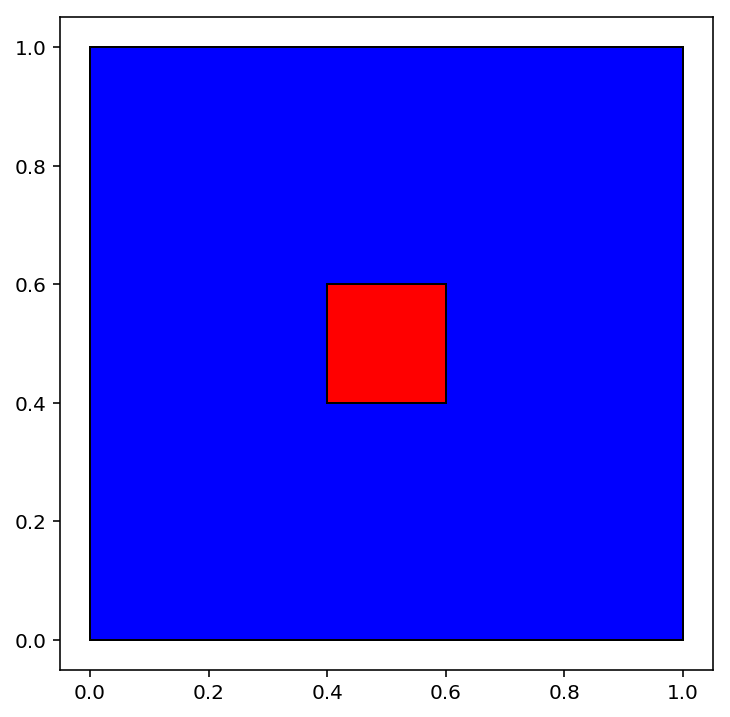

In [29]:
ext_domain = plt.Rectangle((0,0), 1, 1, ec="k", fc="b")
int_domain = plt.Rectangle((0.4,0.4), 0.2, 0.2, fc="r", ec="k")
ax = plt.gca()  # current figure, create one if it doesn't exist
ax.add_patch(ext_domain)
ax.add_patch(int_domain)
plt.axis('scaled')

To represent values of $u$ and $v$ on the mesh we will use numpy arrays. Numpy provides `ndarray` multi-dimensional array object
and derived objects such as masked arrays and matrices. It provides also a set of functions for fast array mathematical operations.



## Multidimensional array

In [55]:
np.arange(4*5).reshape(4,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [56]:
np.zeros((4,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [57]:
np.full((4,5),3)

array([[3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3]])

In [58]:
np.arange(1,5) * np.arange(1,6)[:,np.newaxis]

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16],
       [ 5, 10, 15, 20]])

In [59]:
np.fromfunction(lambda i,j: i+j,(4,5))

array([[0., 1., 2., 3., 4.],
       [1., 2., 3., 4., 5.],
       [2., 3., 4., 5., 6.],
       [3., 4., 5., 6., 7.]])

# Laplacian

The laplacian is computed with the following numerical scheme

$$
\Delta u_{i,j} \approx u_{i,j-1} + u_{i-1,j} -4u_{i,j} + u_{i+1, j} + u_{i, j+1}
$$

In [10]:
def laplacian_python(u):
    
    delta_u = u.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            delta_u[i][j] = u[i][j-1]+u[i-1][j] \
                             -4*u[i][j]+u[i+1][j]+u[i][j+1]
    
    return delta_u

In [11]:
%timeit laplacian_python(u)

7.53 ms ± 276 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [62]:
x = np.linspace(-np.pi,np.pi,100)
y = np.linspace(-np.pi,np.pi,100)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.exp(-(xx)*(xx))*np.exp(-(yy)*(yy))

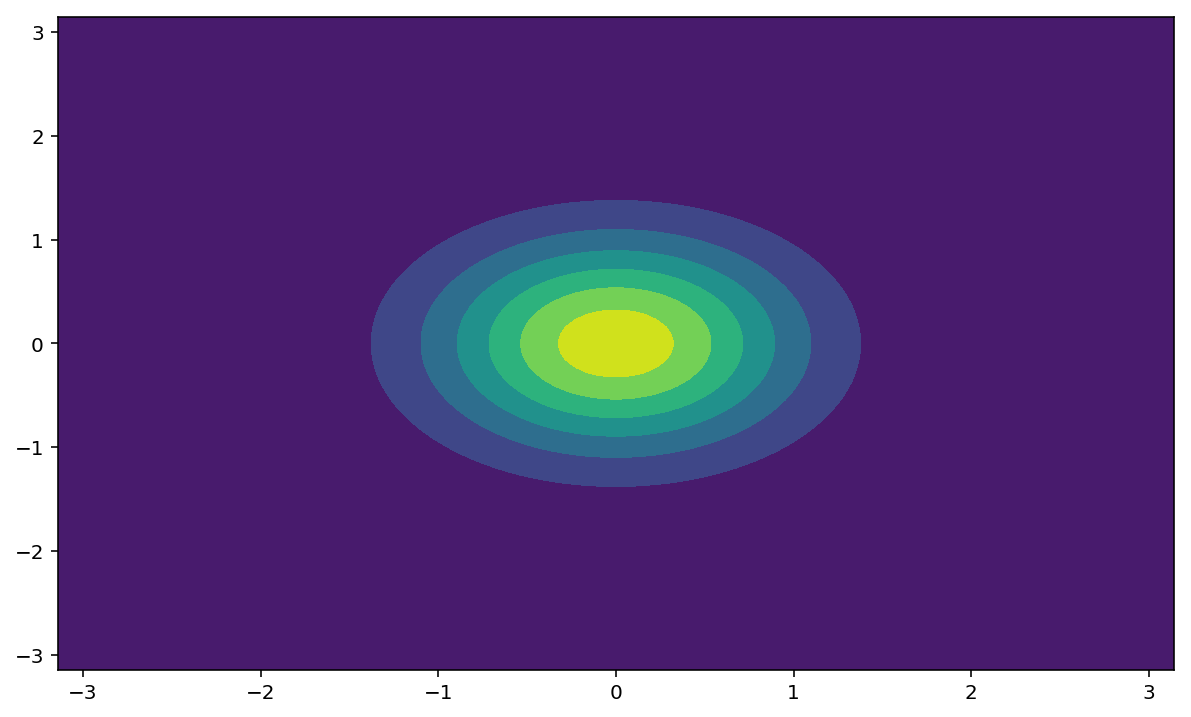

In [63]:
plt.contourf(x,y,z)

### Exercise

Rewrite the laplacian function using Numy arrays operations

```py
def laplacian(u):
    delta_u = np.copy(u)
    ###
    return delta_u
```

# Slices Are References
- Slices are references to memory in the original array.
- Changing values in a slice also changes the original array.



In [64]:
a = np.arange(10)
b = a[3:6]
b  # `b` is a view of array `a` and `a` is called base of `b`

array([3, 4, 5])

In [65]:
b[0] = -1
a  # you change a view the base is changed.

array([ 0,  1,  2, -1,  4,  5,  6,  7,  8,  9])

In [66]:
c = a[7:8].copy() # Explicit copy of the array slice
c[0] = -1 
a

array([ 0,  1,  2, -1,  4,  5,  6,  7,  8,  9])

# Fancy Indexing

In [67]:
a = np.random.randint(20, size=(4, 5))
a

array([[14, 16, 12,  0, 11],
       [ 0,  5, 15, 18,  4],
       [15,  3,  3, 17,  0],
       [17,  9, 11, 15, 17]])

In [68]:
locations = a % 3 == 0 # locations can be used as a mask
a[locations] = 0 #set to 0 only the values that are divisible by 3
a

array([[14, 16,  0,  0, 11],
       [ 0,  5,  0,  0,  4],
       [ 0,  0,  0, 17,  0],
       [17,  0, 11,  0, 17]])

In [70]:
a += a == 0
a

array([[14, 16,  1,  1, 11],
       [ 1,  5,  1,  1,  4],
       [ 1,  1,  1, 17,  1],
       [17,  1, 11,  1, 17]])

### Exercise 

Write the initialization of the Grayscott model using fancy indexing

```py

def init(n):
   u = np.zeros((n,n),dtype=np.float64)
   ###
   return u
```

In [71]:
nx, ny = 100, 100
dx, dy = 1./nx, 1./ny

u, v = [], []
for i in range(nx):
    u.append([0 for j in range(ny)])
    
for i in range(nx):
    for j in range(ny):
        if 400 < i < 600 and 400 < j < 600:
            u[i][j] = 0.5

# Array Operations over a given axis

In [82]:
a = np.arange(20).reshape(5,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [84]:
a.sum(axis=0) # sum of each column

array([40, 45, 50, 55])

In [85]:
a.mean(axis=1) # mean of each line

array([ 1.5,  5.5,  9.5, 13.5, 17.5])

# Broadcasting rules

Broadcasting rules allow you to make an outer product between two vectors: the first method involves array tiling, the second one involves broadcasting. The last method is significantly faster.



In [163]:
n = 1000
a = np.arange(n)
ac = a[:, np.newaxis]   # column matrix
ar = a[np.newaxis, :]   # row matrix

In [164]:
%timeit np.tile(a, (n,1)).T * np.tile(a, (n,1))

11.7 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [165]:
%timeit ac * ar

1.75 ms ± 20.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [166]:
np.all(np.tile(a, (n,1)).T * np.tile(a, (n,1)) == ac * ar)

True

## Periodic domain

In [141]:
def periodic_bc(u):
    u[0, :] = u[-2, :]
    u[-1, :] = u[1, :]
    u[:, 0] = u[:, -2]
    u[:, -1] = u[:, 1]

In [142]:
def grayscott(U, V, Du, Dv, F, k):
    
    u, v = U[1:-1,1:-1], V[1:-1,1:-1]

    Lu = laplacian(U)
    Lv = laplacian(V)

    uvv = u*v*v
    u += Du*Lu - uvv + F*(1 - u)
    v += Dv*Lv + uvv - (F + k)*v

    periodic_bc(U)
    periodic_bc(V)

In [86]:
%%time
from tqdm import tqdm_notebook as tqdm
from PIL import Image
U, V = init(300)

def create_image():
    global U, V
    for t in range(40):
        grayscott(U, V, Du, Dv, F, k)
    V_scaled = np.uint8(255*(V-V.min()) / (V.max()-V.min()))
    return V_scaled

def create_frames(n):

    return [create_image() for i in tqdm(range(n))]
    
frames = create_frames(500)

NameError: name 'init' is not defined

In [145]:
import imageio
frames_scaled = [np.uint8(255 * frame) for frame in frames]
imageio.mimsave('movie.gif', frames_scaled, format='gif', fps=60)

![grayscott](movie.gif "grayscott")

# Numpy Matrix

Specialized 2-D array that retains its 2-D nature through operations. It has certain special operators, such as $*$ (matrix multiplication) and $**$ (matrix power).

In [87]:
m = np.matrix('1 2; 3 4') #Matlab syntax
m

matrix([[1, 2],
        [3, 4]])

In [88]:
a = np.matrix([[1, 2],[ 3, 4]]) #Python syntax
a

matrix([[1, 2],
        [3, 4]])

In [89]:
a = np.arange(1,4)
b = np.mat(a) # 2D view, no copy!
b, np.may_share_memory(a,b)

(matrix([[1, 2, 3]]), True)

In [90]:
a = np.matrix([[1, 2, 3],[ 3, 4, 5]])
a * b.T # Matrix vector product

matrix([[14],
        [26]])

In [91]:
m * a # Matrix multiplication

matrix([[ 7, 10, 13],
        [15, 22, 29]])

In [94]:
a = np.random.randint(20, size=(4, 4))
b = np.arange(4)

np.linalg.solve(a,b)

array([-0.29659826, -0.26229969, -0.13466404,  0.96654484])